1. data_xy_100.txt 파일을 읽어 scatter plot을 그리고 선형회귀 모델을 사용하여 𝑦=𝑤_1 𝑥+𝑤_0 식에서 절편 𝑤_0과 기울기 𝑤_1 그리고 Mean Squared Error를 구한 뒤 scatter plot에 선형회귀식을 추가하는 파이썬 스크립트를 작성해보세요.

Text(0.5, 1.0, 'Scatter plot')

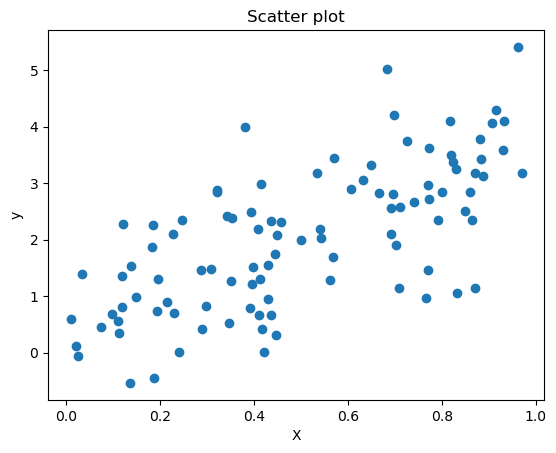

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data_xy_100.txt', delimiter='\t')

X = data[:,0].reshape(-1,1)
y = data[:,1]

plt.scatter(X,y,label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot')


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = np.loadtxt('data_xy_100.txt', delimiter='\t')

X = data[:,0].reshape(-1,1)
y = data[:,1]

model = LinearRegression()
model.fit(X,y)

print(f"기울기기 w_1: {model.coef_}")
print(f"절편 w_0: {model.intercept_}")

기울기기 w_1: [3.15991329]
절편 w_0: 0.45752030142597633


In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse}")

MSE: 0.8410734645342681


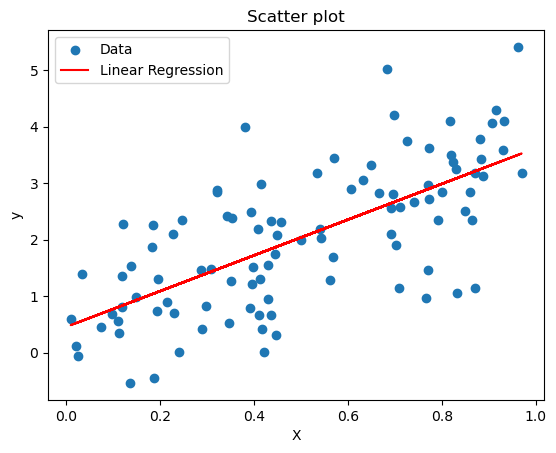

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = np.loadtxt('data_xy_100.txt', delimiter='\t')

X = data[:,0].reshape(-1,1)
y = data[:,1]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X,y,label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot')
plt.legend()

2. iris 데이터에서 linear regression 을 사용하여 petal length (cm) 을 예측하는 모델을 만들어 보세요.
모델의 Mean Squared Error와 Mean Root Squared Error의 값은 어떻게 되나요?

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()

import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=["species"])
iris_df = pd.concat([iris_df, target_df], axis=1)

X = iris_df.drop(labels="petal length (cm)", axis=1)
y = iris_df["petal length (cm)"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

from sklearn.linear_model import LinearRegression
model = LinearRegression()



model.fit(X_train,y_train)

pred = model.predict(X_test)

import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mrse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MRSE: {mrse}")

MSE: 0.10119577391228138
MRSE: 0.31811283204592894


In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=["species"])
iris_df = pd.concat([iris_df, target_df], axis=1)

X = iris_df.drop(labels="petal length (cm)", axis=1)
y = iris_df["petal length (cm)"]

print(X)

     sepal length (cm)  sepal width (cm)  petal width (cm)  species
0                  5.1               3.5               0.2        0
1                  4.9               3.0               0.2        0
2                  4.7               3.2               0.2        0
3                  4.6               3.1               0.2        0
4                  5.0               3.6               0.2        0
..                 ...               ...               ...      ...
145                6.7               3.0               2.3        2
146                6.3               2.5               1.9        2
147                6.5               3.0               2.0        2
148                6.2               3.4               2.3        2
149                5.9               3.0               1.8        2

[150 rows x 4 columns]
